This code is here to help normalise the data to the input power

In [ ]:
from datetime import datetime
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# PD converts optical power into voltage linearly
# Units of mW/V, NOT dBm 
responsivity_mw_v = 10 
print("io")

io


In [7]:
def extract_file_datestamp(file_path):
    """
    Extracts the datestamp from the file path based on the presence of 'CSV_Waveforms'.
    Searches for the first folder name matching the DD.MM.YYYY format after 'CSV_Waveforms'.
    """
    # Normalize the path and split it into parts
    parts = os.path.normpath(file_path).split(os.sep)
    
    # Check if "CSV_Waveforms" is part of the path
    if "CSV_Waveforms" in parts:
        # Get the index of "CSV_Waveforms"
        idx = parts.index("CSV_Waveforms")
        
        # Look for the date folder immediately after "CSV_Waveforms"
        if idx + 1 < len(parts):  # Ensure there's another folder after "CSV_Waveforms"
            potential_date = parts[idx + 1]
            
            # Validate the format of the potential date (DD.MM.YYYY)
            if potential_date.count('.') == 2:
                try:
                    day, month, year = map(int, potential_date.split('.'))  # Check if it's a valid date
                    return potential_date  # Return the valid datestamp
                except ValueError:
                    pass  # Ignore if the part is not a valid date
    
    raise ValueError("No valid datestamp found in the file path.")

# file_path = r"CSV_Waveforms/18.11.2024/final optical data/18.11.2024_16.50.38_average_filtered_optical_waveform_dataset.csv"
# datestamp = extract_file_datestamp(file_path)
# print(f"Extracted datestamp: {datestamp}")

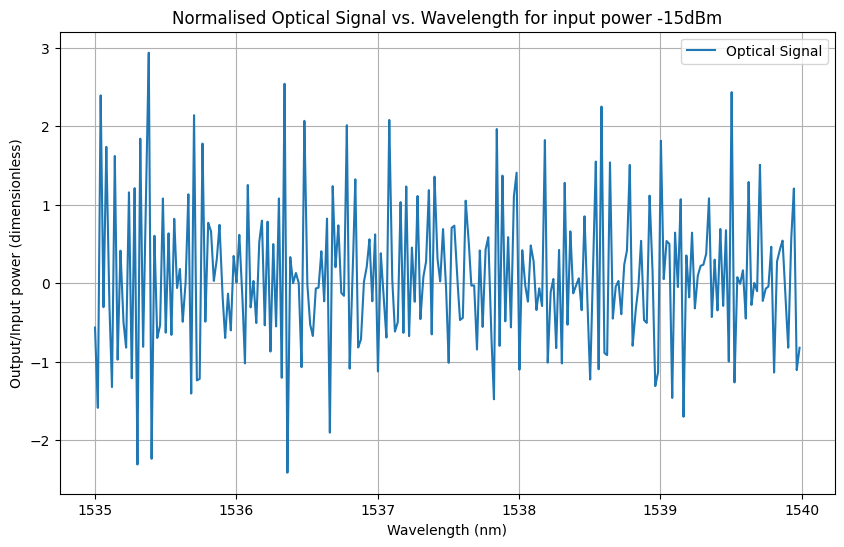

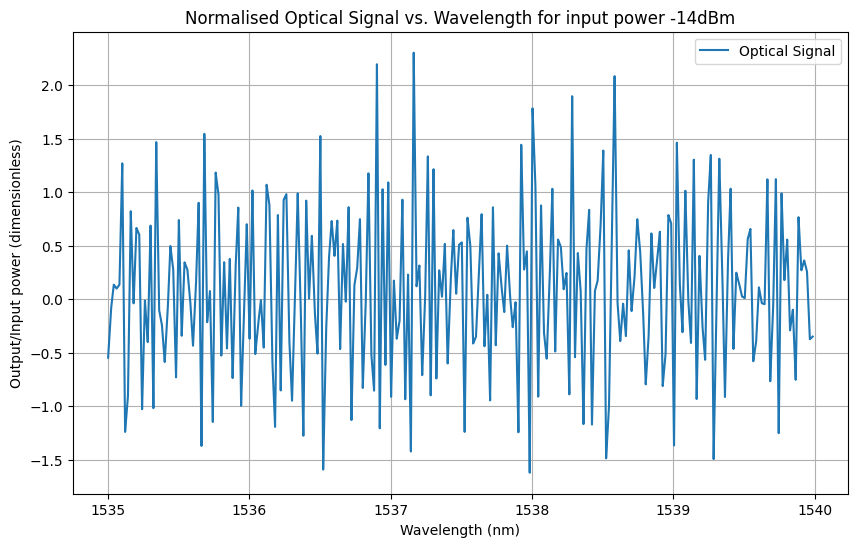

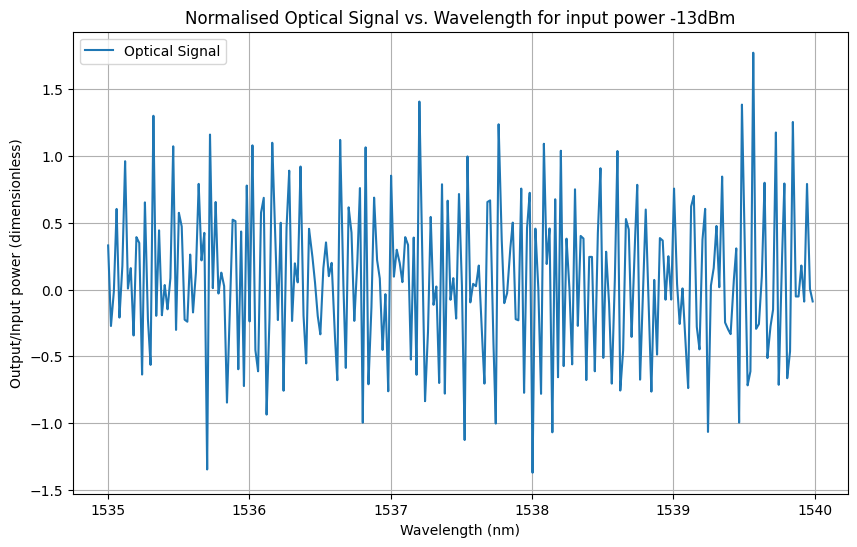

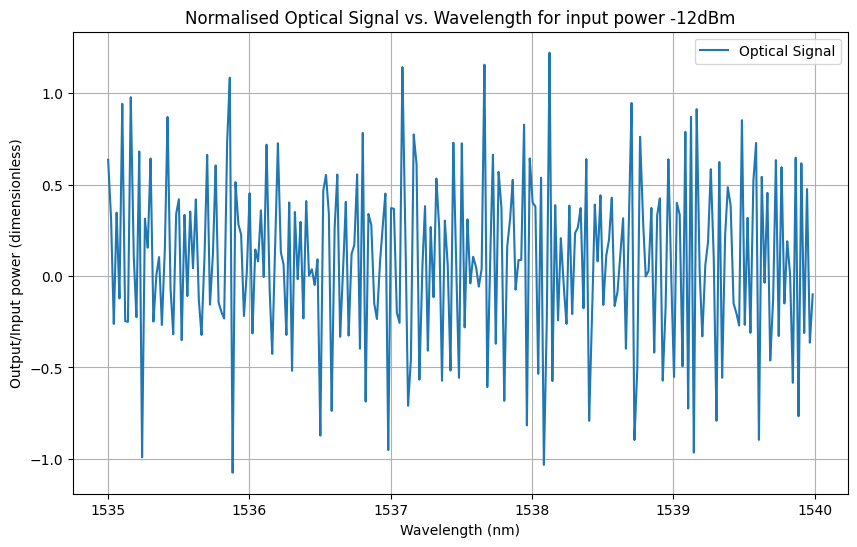

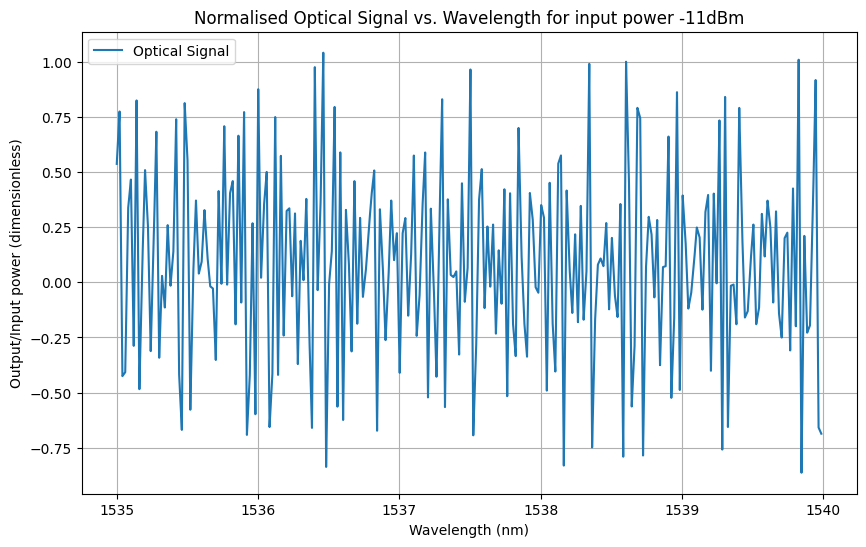

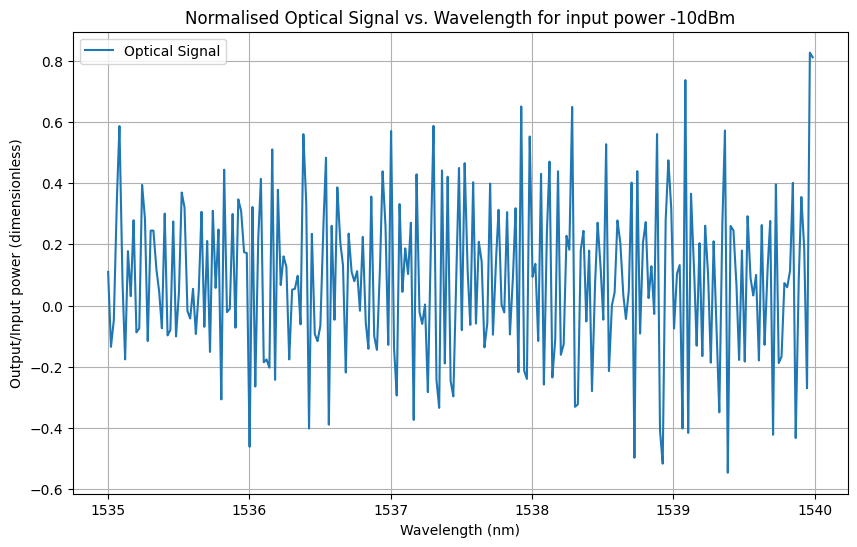

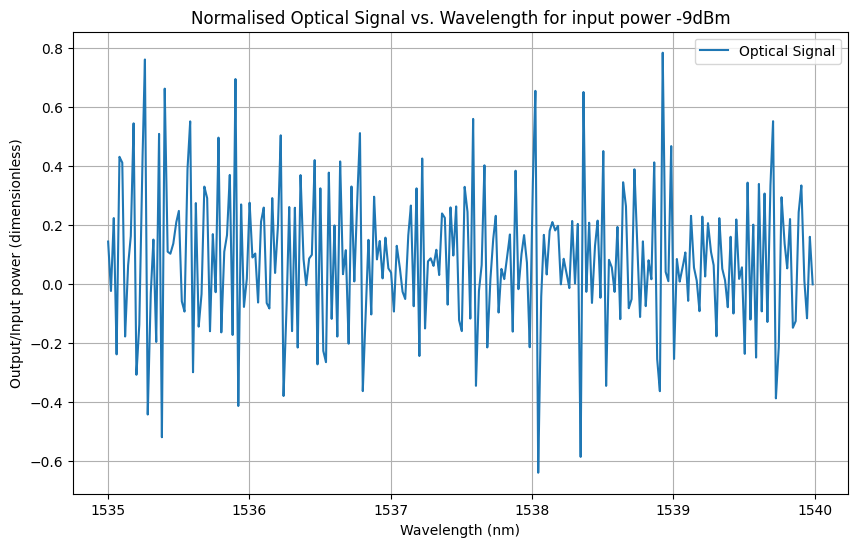

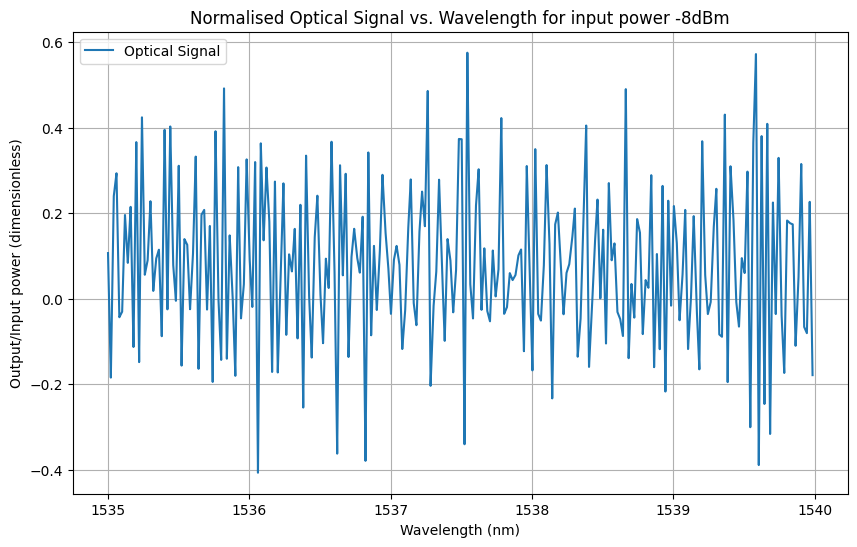

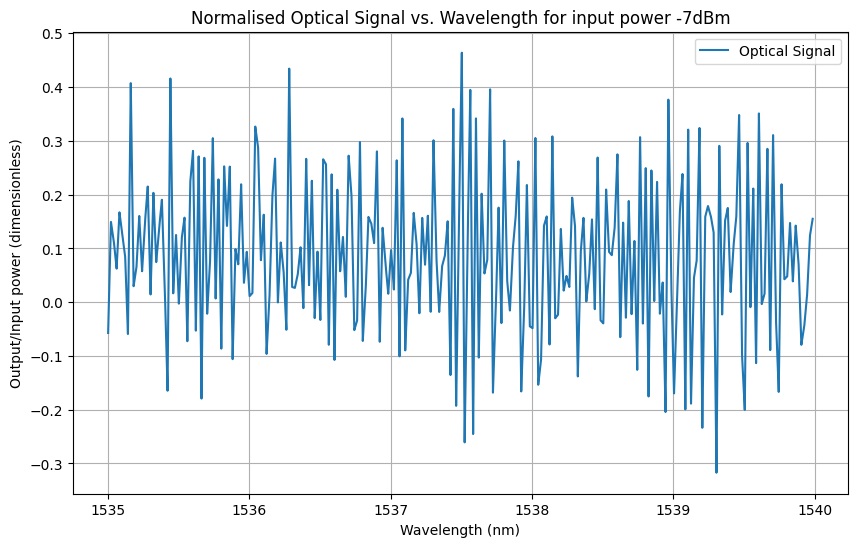

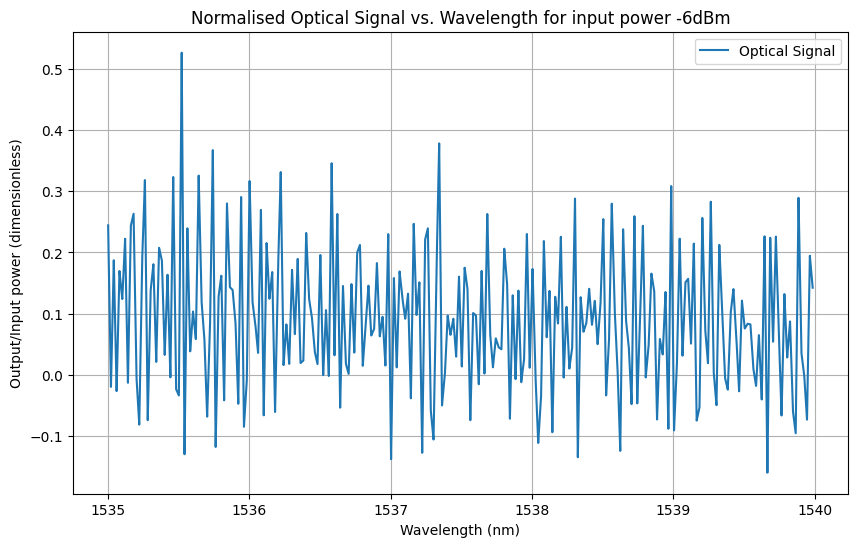

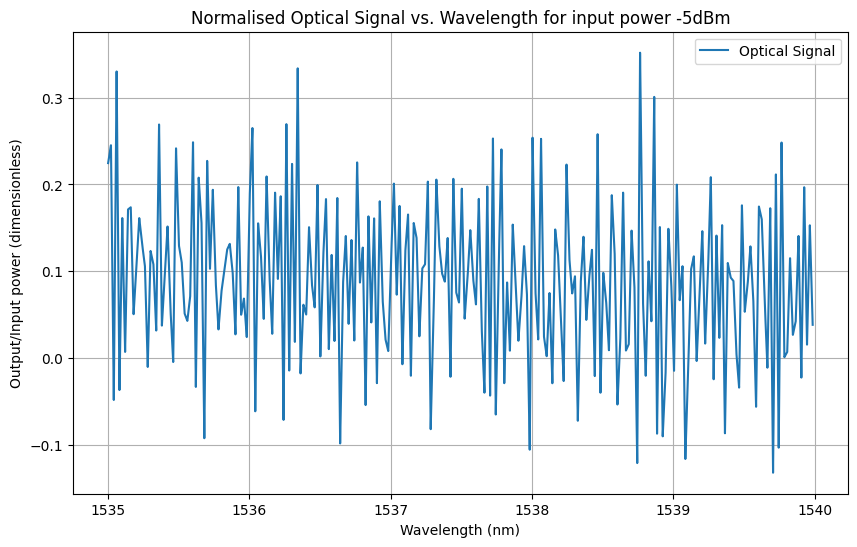

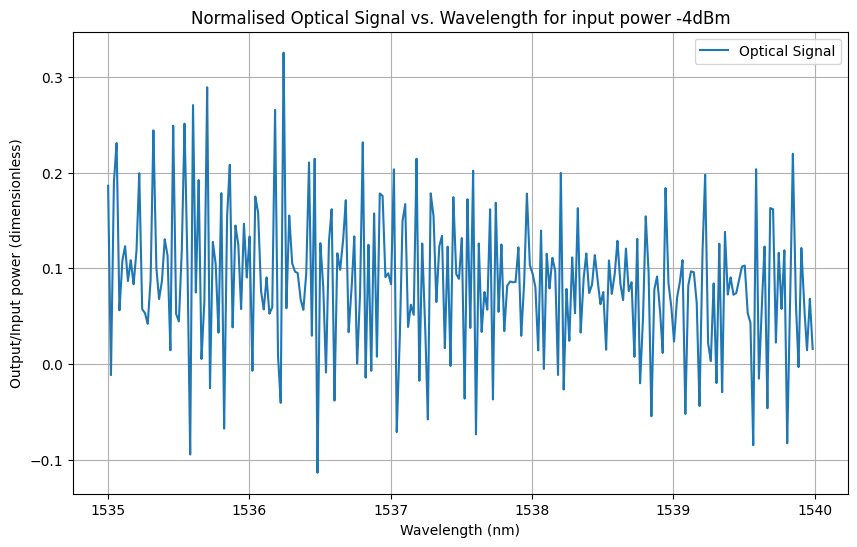

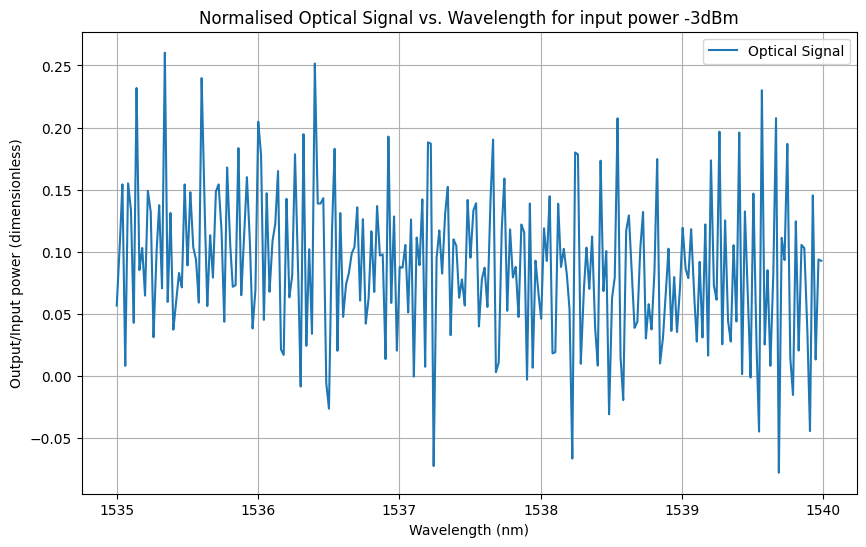

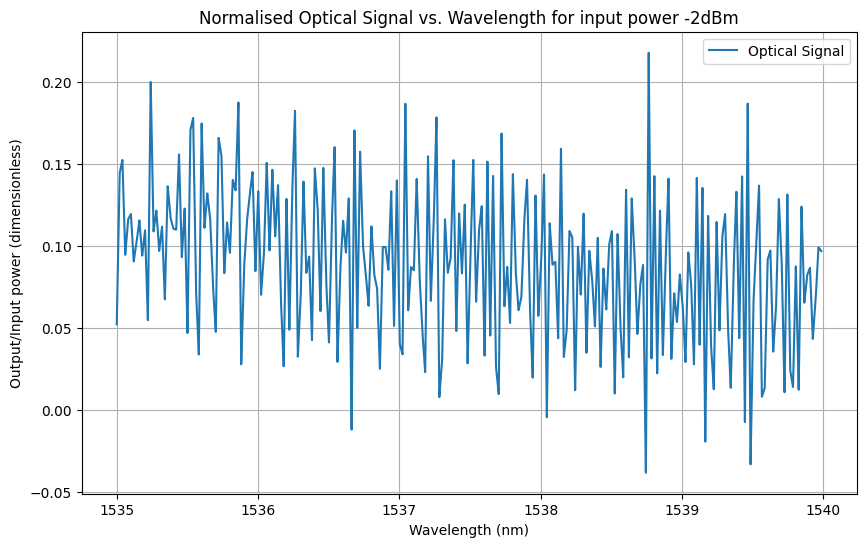

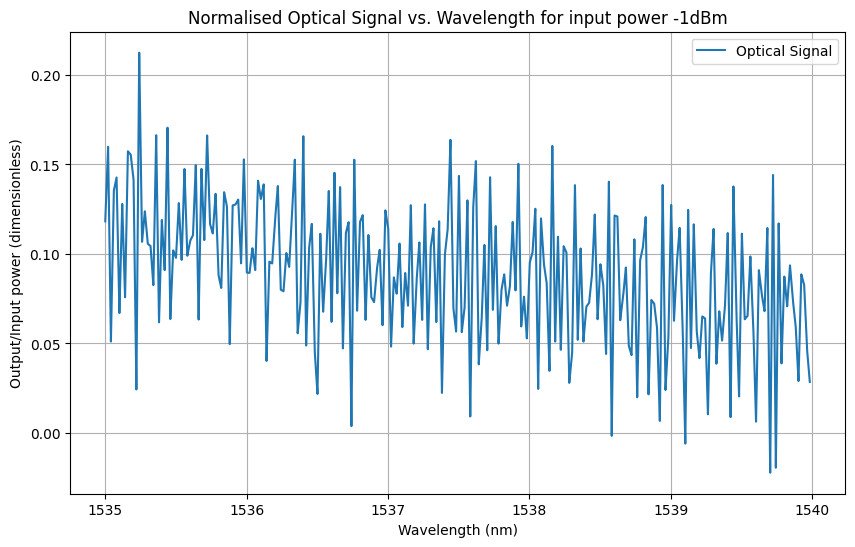

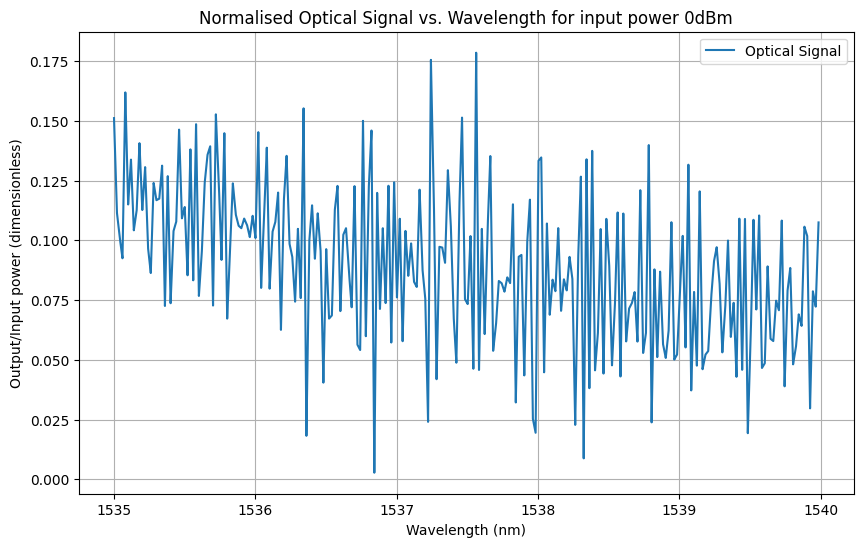

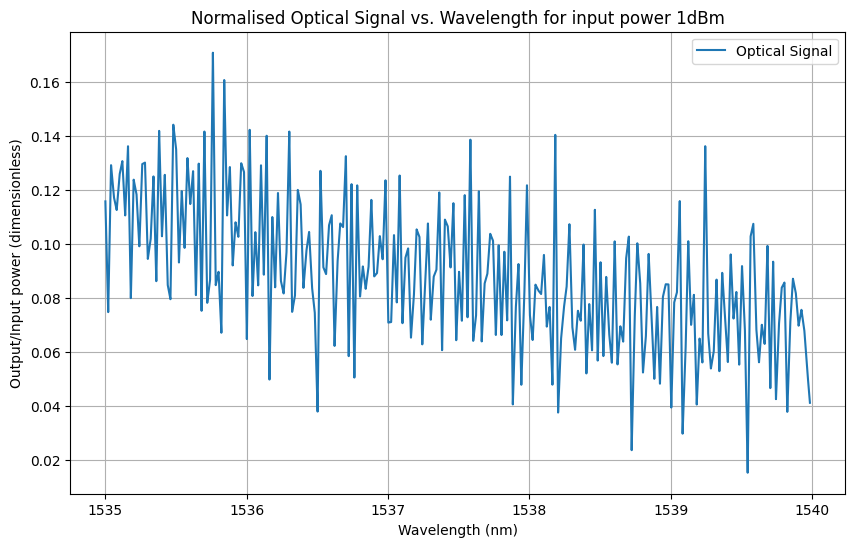

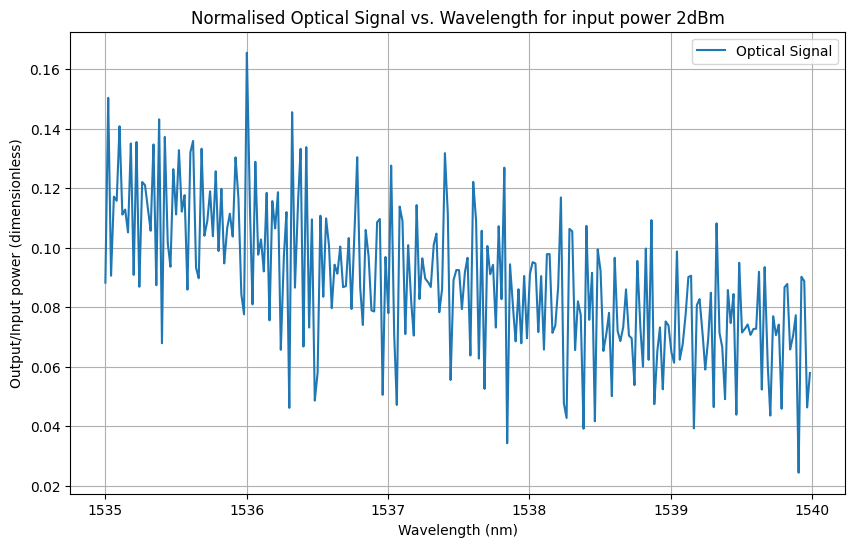

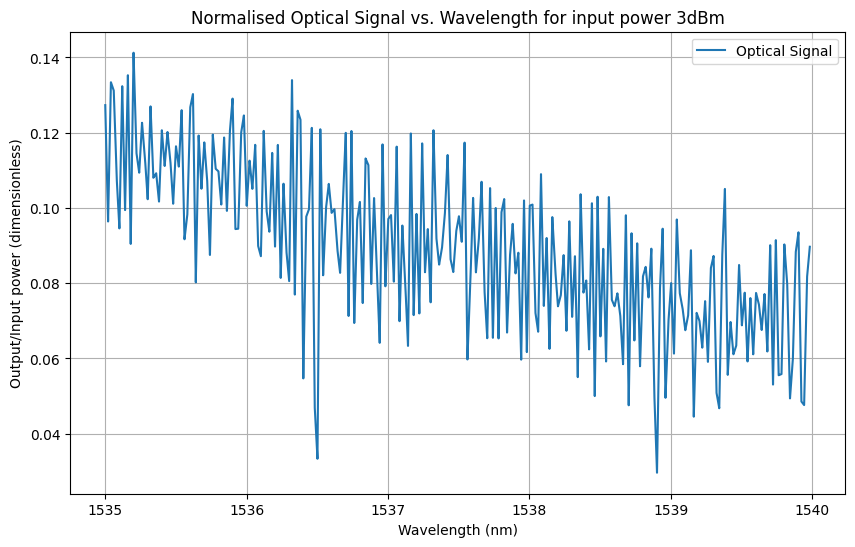

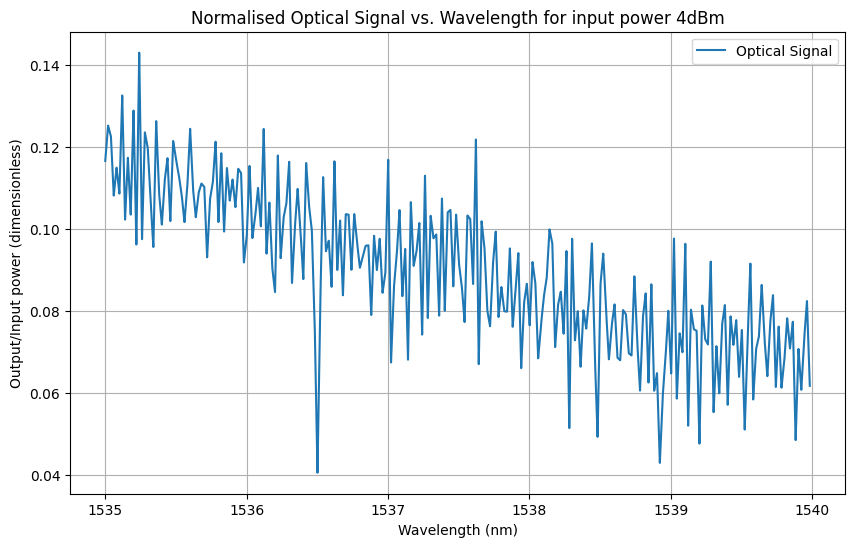

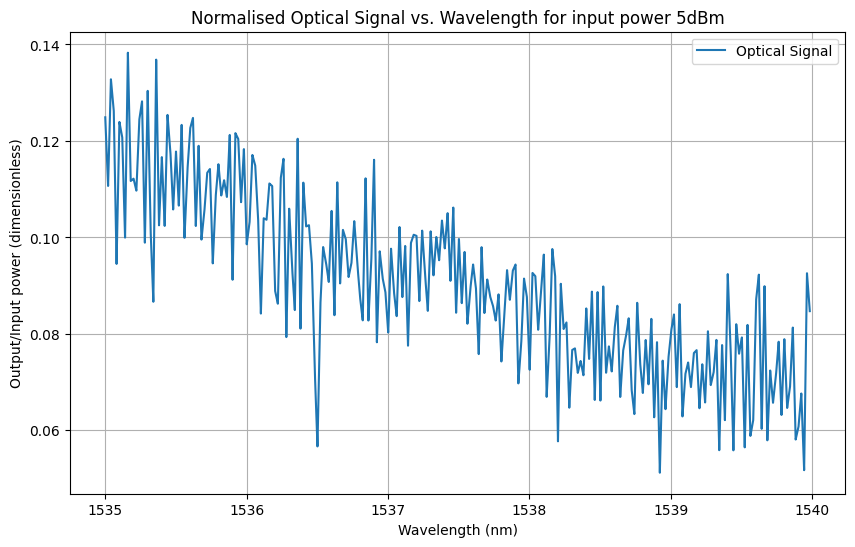

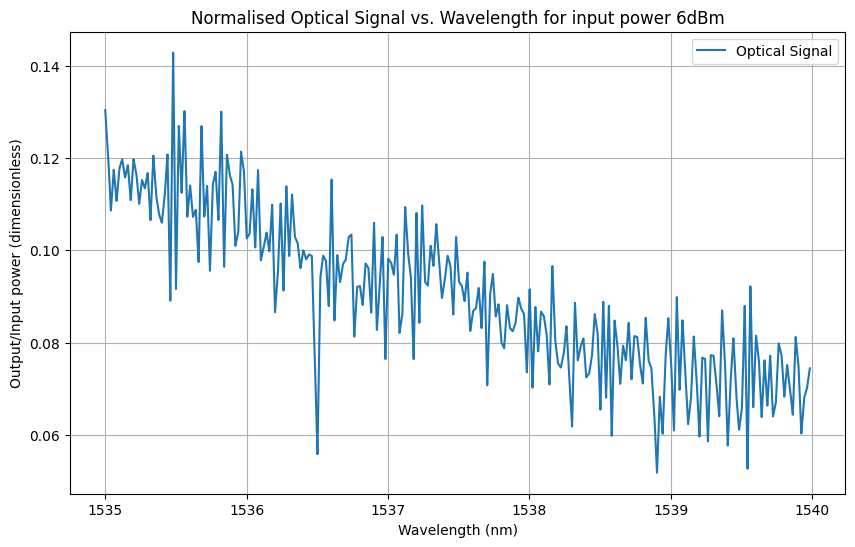

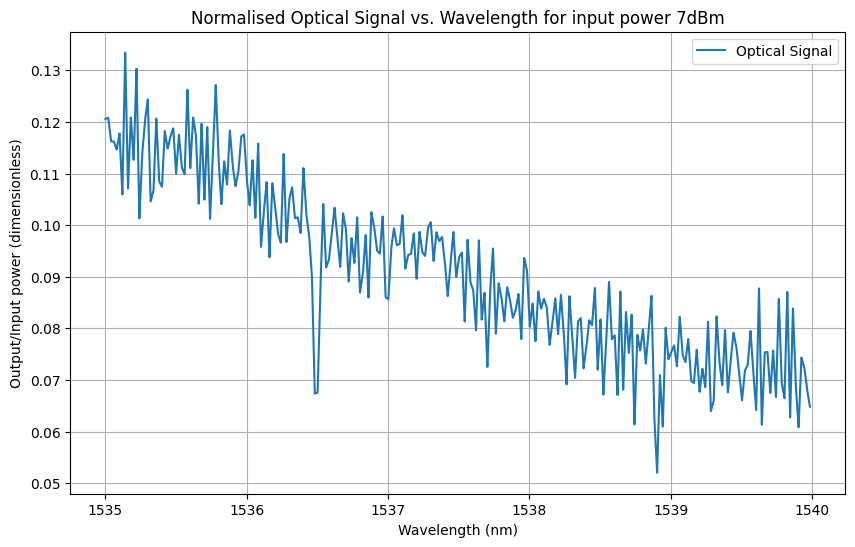

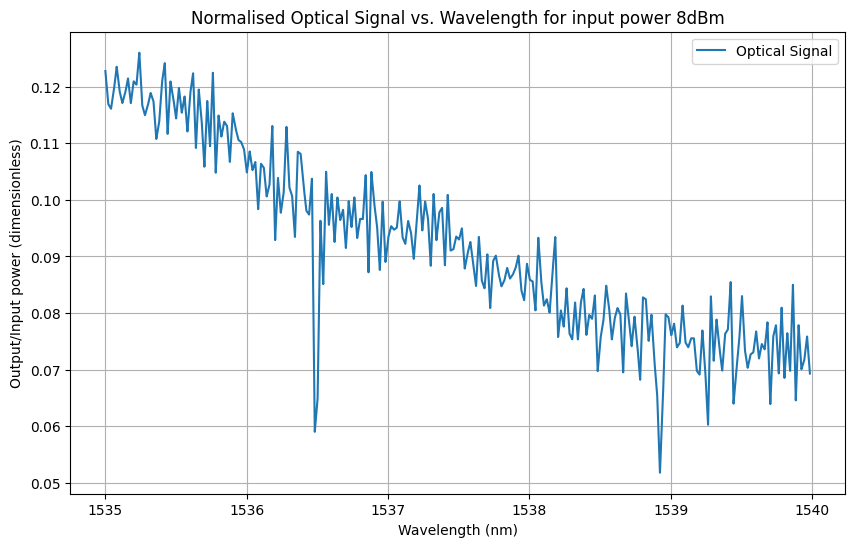

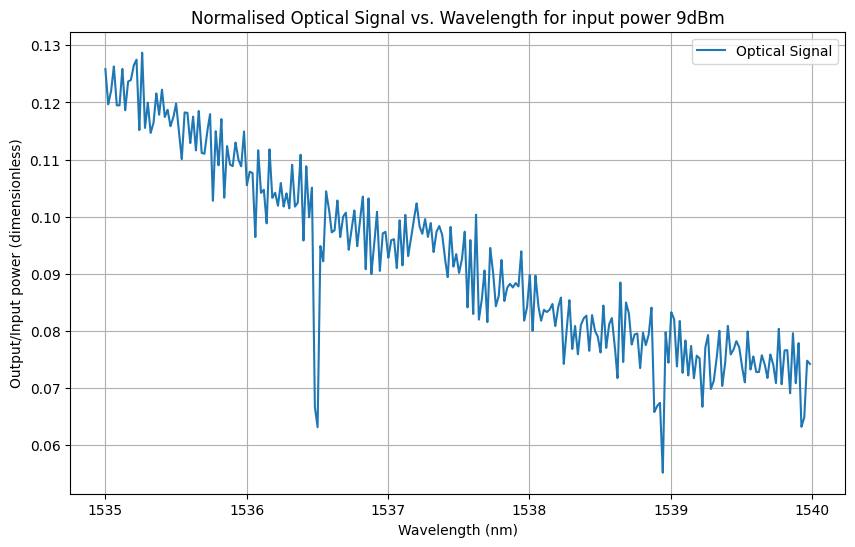

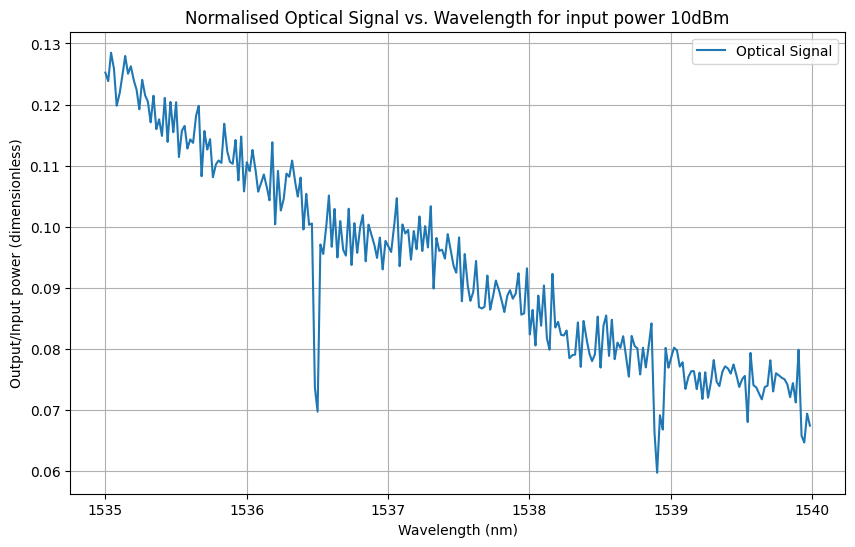

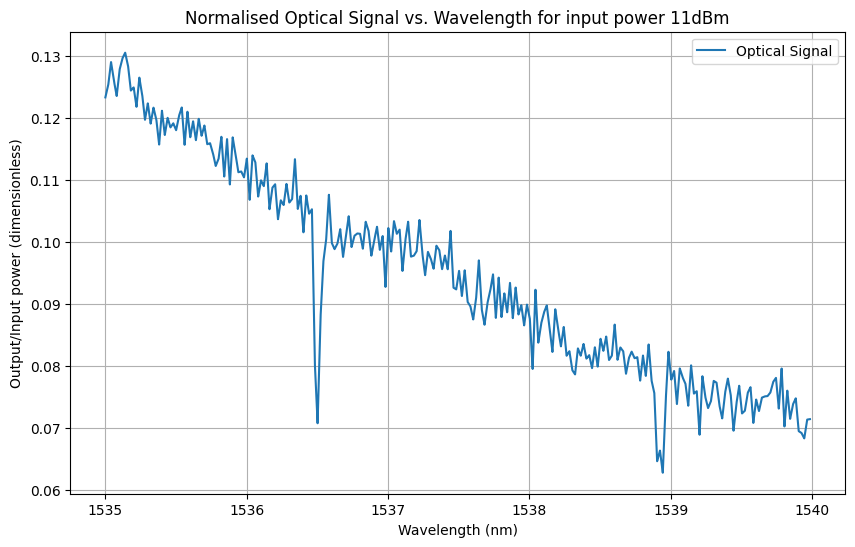

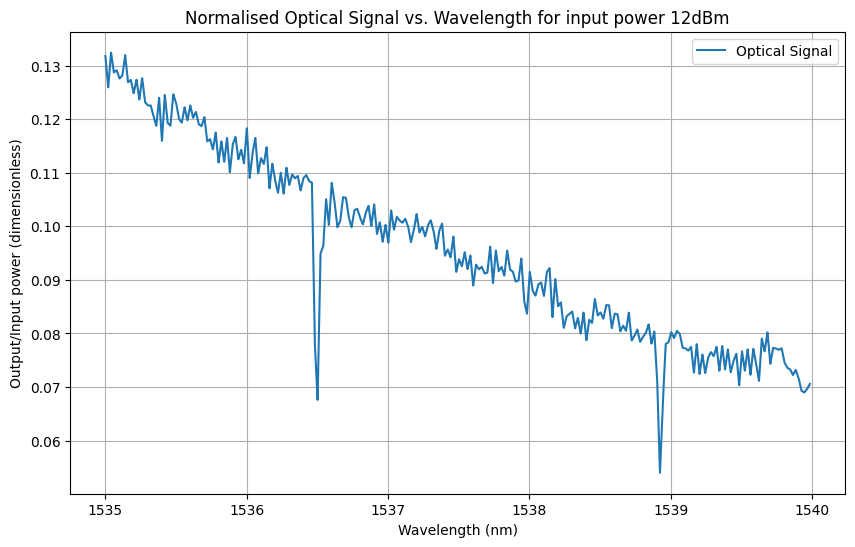

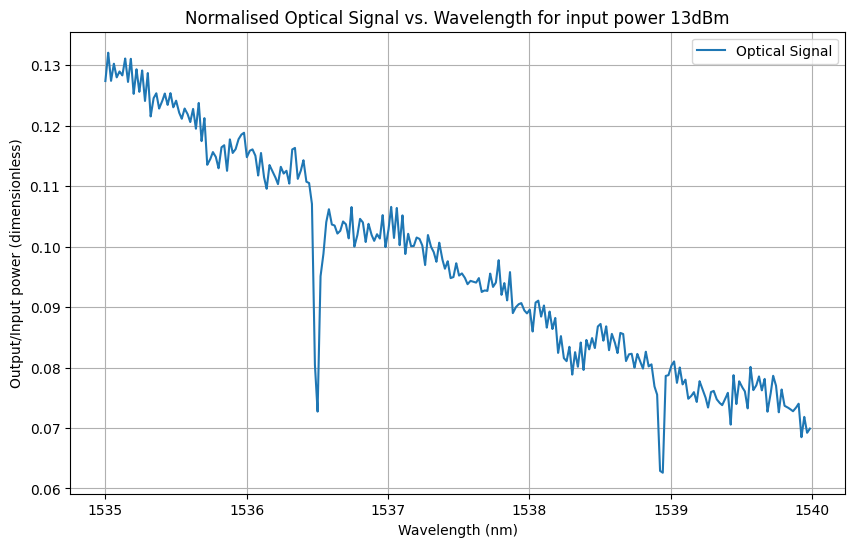

In [ ]:
def extract_dbm_value(file_path):
    file_name = os.path.basename(file_path)
    dbm_part = file_name.split("dBm")[0]  # Extract the part before "dBm"
    return int(dbm_part)  # Convert to integer for numerical sorting (floats cannot sort)


# Define the folder (folder containing individual csv files) path
folder_path = r"C:\Users\groov\VSCode\CSV_Waveforms\19.11.2024\19.11.2024_base_temp_power_sweeps\final_optical_data"

# Get a list of all CSV file names in the folder
csv_files = glob.glob(f"{folder_path}/*.csv")

# Sort the file list based on the extracted dBm value
sorted_csv_files = sorted(csv_files, key=extract_dbm_value)

# Extract the first part of each file name
for file_path in sorted_csv_files:

    input_power_dbm = extract_dbm_value(file_path)

    input_power_mw = 10 ** (input_power_dbm / 10)

    data = data = pd.read_csv(file_path, header=None, skiprows=1)       # skip the header row

    # Extract the wavelength and optical signal data
    # # Recall that when we saved files into csv form, it was header="Wavelength (nm), Optical Signal (V)"

    wavelength = data.iloc[:, 0]  # First column, which is wavelengths

    optical_signal = data.iloc[:, 1]  # Second column, which is output voltage of PD reading

    optical_signal_in_mw = optical_signal * responsivity_mw_v

    normalised_optical_signal = optical_signal_in_mw / input_power_mw

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, normalised_optical_signal, label="Optical Signal")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Output/Input power (dimensionless)")
    plt.title(f"Normalised Optical Signal vs. Wavelength for input power {input_power_dbm}dBm")
    plt.grid(True)
    plt.legend()
    plt.show()

    datestamp = datetime.now().strftime("%d.%m.%Y")
    timestamp = datetime.now().strftime("%d.%m.%Y_%H.%M.%S")

    raw_data_datestamp = extract_file_datestamp(file_path)
    output_folder = f"C:/Users/groov/VSCode/CSV_Waveforms/{datestamp}/normalised_optical_data_from_{raw_data_datestamp}"
    
    # Create the folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    csvfilename = os.path.join(output_folder, f"{input_power_dbm}dBm_input_power_processed_at_{timestamp}.csv")
    np.savetxt(csvfilename, np.column_stack((wavelength, normalised_optical_signal)), delimiter=",",header="Wavelength (nm), Output/Input power (dimensionless)")
